In [50]:
#importing required libraries to load required data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
#loading the vehicle loans csv file as a dataframe using pd.read_csv and using each loan's unique id as index column

loan_df = pd.read_csv('C:\\Users\\Daniel-Panovest\\Downloads\\python ultra\\files\data\\vehicle_loans.csv', index_col = 'UNIQUEID')

In [52]:
#inspecting the vehicle loan dataframe

loan_df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [53]:
#inspecting the number of rows and columns in the dataframe
loan_df.shape

(233154, 40)

In [ ]:
#converting disbursal date to datetime
loan_df.DISBURSAL_DATE = pd.to_datetime(loan_df.DISBURSAL_DATE)

In [55]:
#viewing max and min disbursal date and dataset timespan
print(f'the maximum disbursal date is: {loan_df.DISBURSAL_DATE.max()}')
print(f'the minimum disbursal date is: {loan_df.DISBURSAL_DATE.min()}')
print(f'the dataset timespan is: {loan_df.DISBURSAL_DATE.max() - loan_df.DISBURSAL_DATE.min()}')

the maximum disbursal date is: 2018-12-10 00:00:00
the minimum disbursal date is: 2018-01-08 00:00:00
the dataset timespan is: 336 days 00:00:00


In [56]:
#viewing frequencies of loan default value counts
loan_df.LOAN_DEFAULT.value_counts(normalize=True)

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64

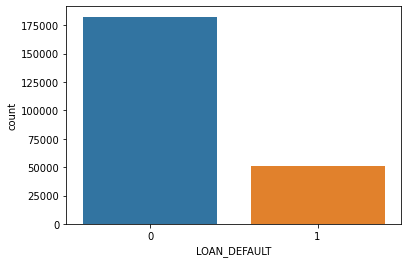

In [57]:
#countplot for unique loan default coulumn values
sns.countplot(x="LOAN_DEFAULT", data=loan_df)
plt.show();

In [58]:
#checking for missing values
loan_df.isnull().any()
loan_df.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

In [59]:
#viewing value counts under employment type column
loan_df.EMPLOYMENT_TYPE.value_counts()

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64

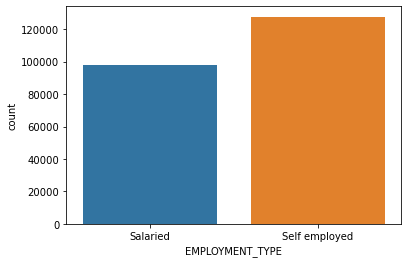

In [60]:
#countplot for unique employment type column values
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df)
plt.show();

In [61]:
#fill null values with "missing" for countplot to account for null values, using a dict
loan_df = loan_df.fillna(value={'EMPLOYMENT_TYPE': 'Missing'})
loan_df.EMPLOYMENT_TYPE.value_counts()

Self employed    127635
Salaried          97858
Missing            7661
Name: EMPLOYMENT_TYPE, dtype: int64

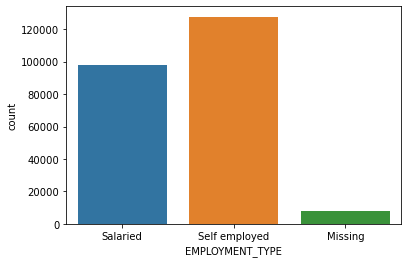

In [62]:
sns.countplot(x="EMPLOYMENT_TYPE", data=loan_df);

In [ ]:
#intuitively deriving the borrower's age as at loan disbursal
loan_df.DISBURSAL_DATE = pd.to_datetime(loan_df.DISBURSAL_DATE)
loan_df.DATE_OF_BIRTH = pd.to_datetime(loan_df.DATE_OF_BIRTH)

In [64]:
#viewing sample of borrower's age at disbursal 
loan_df["AGE"] = loan_df.DISBURSAL_DATE - loan_df.DATE_OF_BIRTH
loan_df.AGE.sample(n=5)

UNIQUEID
520039   16333 days
585815   12984 days
635430    9033 days
517255    7610 days
574301   20307 days
Name: AGE, dtype: timedelta64[ns]

In [65]:
#extracting disbursal month using dt.month - a datetime like property accessor 
loan_df["DISBURSAL_MONTH"] = loan_df.DISBURSAL_DATE.dt.month
loan_df.DISBURSAL_MONTH.value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64

In [66]:
#coverting days to year to derive borrower's age as at disbursal
loan_df.AGE = loan_df.AGE // np.timedelta64(1,'Y')
loan_df.AGE.sample(n=5)

UNIQUEID
601503    22
650520    26
591423    28
596141    26
502874    40
Name: AGE, dtype: int64

In [67]:
#dropping disbursal date and date of birth columns
loan_df = loan_df.drop(["DISBURSAL_DATE", "DATE_OF_BIRTH"],axis=1)

In [68]:
loan_df.AVERAGE_ACCT_AGE.sample(n=5)

UNIQUEID
466428    0yrs 0mon
462954    0yrs 0mon
517138    0yrs 4mon
496983    0yrs 0mon
509457    0yrs 5mon
Name: AVERAGE_ACCT_AGE, dtype: object

In [69]:
#function to return total months from each borrower account info column in years and months str

def calculate_months(str_list):
    years = int(str_list[0]) #convert str to int
    months = int(str_list[1]) #convert str to int

    total_months = (years * 12) + months #convert years to month and add to exsiting month
    return total_months

In [70]:
#function to create new column for total months extracted from borrowers account info columns in years and months str

def extract_months(*col_name):
    for column in col_name:
        new_col = column + "_MONTHS" 
        loan_df[new_col] = loan_df[column].str.findall('\d+').map(calculate_months) #str.findall regex finds integers in strings

In [71]:
#calling the extract_months function

extract_months('CREDIT_HISTORY_LENGTH', 'AVERAGE_ACCT_AGE')
loan_df[["CREDIT_HISTORY_LENGTH_MONTHS", "CREDIT_HISTORY_LENGTH", "AVERAGE_ACCT_AGE_MONTHS", "AVERAGE_ACCT_AGE"]].sample(n=5)

,CREDIT_HISTORY_LENGTH_MONTHS,CREDIT_HISTORY_LENGTH,AVERAGE_ACCT_AGE_MONTHS,AVERAGE_ACCT_AGE
UNIQUEID,,,,
455273,0,0yrs 0mon,0,0yrs 0mon
620250,4,0yrs 4mon,4,0yrs 4mon
598810,29,2yrs 5mon,17,1yrs 5mon
419952,0,0yrs 0mon,0,0yrs 0mon
488633,9,0yrs 9mon,9,0yrs 9mon


In [72]:
#dropping irrelevant columns
loan_df.drop(["CREDIT_HISTORY_LENGTH", "AVERAGE_ACCT_AGE"], axis=1)

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,EMPLOYEE_CODE_ID,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_MONTH,CREDIT_HISTORY_LENGTH_MONTHS,AVERAGE_ACCT_AGE_MONTHS
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,...,0,0,0,0,0,0,34,3,0,0
537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,...,1991,0,0,1,0,1,33,9,23,23
417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,...,0,0,0,0,0,0,32,1,0,0
624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,...,31,0,0,0,1,1,24,10,15,8
539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,...,0,0,0,0,1,1,41,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626432,63213,105405,60.72,34,20700,48,1050,Salaried,6,3705,...,4084,0,0,0,0,0,30,10,39,21
606141,73651,100600,74.95,34,23775,51,990,Self employed,6,3705,...,1565,0,0,0,0,0,30,10,6,6
613658,33484,71212,48.45,77,22186,86,2299,Salaried,4,3479,...,0,0,0,0,0,0,42,10,0,0


In [73]:
#saving progress
loan_df.to_csv('C:\\Users\\Daniel-Panovest\\Downloads\python ultra\\files\\data\\vehicle_loans_clean.csv')